In [212]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### create function to go through each csv (shallow cleaning)

In [205]:
def shallow_clean_csv(mbti_filename, expected_MBTI):
    temp_mbti_df = pd.read_csv('../data/Data - '+ mbti_filename +'.csv')

    filtered_mbti_df = temp_mbti_df[temp_mbti_df['mbti'].isin([expected_MBTI,'XXXX'])]
    misplaced_len = len(temp_mbti_df) - len(filtered_mbti_df)

    filtered2_mbti_df = temp_mbti_df[temp_mbti_df['mbti'].isin([expected_MBTI])]

    vague_len = len(temp_mbti_df) - len(filtered2_mbti_df) - misplaced_len

    return filtered2_mbti_df, misplaced_len, vague_len

In [163]:
def convert_votes(vote_str):
    # Remove the non-numeric part and turn into a number
    
    # Check if the vote_str contains 'k' and convert accordingly
    if 'k' in vote_str:
        return float(vote_str.replace('k Pdb Votes', '')) * 1000        
    else:
        # initially try for number between 1 and 1000
        try:
            return float(vote_str.replace(' Pdb Votes', ''))
        # consider the singular case for 'vote'
        except:
            return float(vote_str.replace(' Pdb Vote', ''))

In [208]:
istj_df, istj_misplaced, istj_vague = shallow_clean_csv('01ISTJ', 'ISTJ')
estj_df, estj_misplaced, estj_vague = shallow_clean_csv('02ESTJ', 'ESTJ')
isfj_df, isfj_misplaced, isfj_vague = shallow_clean_csv('03ISFJ', 'ISFJ')
esfj_df, esfj_misplaced, esfj_vague = shallow_clean_csv('04ESFJ', 'ESFJ')

esfp_df, esfp_misplaced, esfp_vague = shallow_clean_csv('05ESFP', 'ESFP')
isfp_df, isfp_misplaced, isfp_vague = shallow_clean_csv('06ISFP', 'ISFP')
estp_df, estp_misplaced, estp_vague = shallow_clean_csv('07ESTP', 'ESTP')
istp_df, istp_misplaced, istp_vague = shallow_clean_csv('08ISTP', 'ISTP')

infj_df, infj_misplaced, infj_vague = shallow_clean_csv('09INFJ', 'INFJ')
enfj_df, enfj_misplaced, enfj_vague = shallow_clean_csv('10ENFJ', 'ENFJ')
infp_df, infp_misplaced, infp_vague = shallow_clean_csv('11INFP', 'INFP')
enfp_df, enfp_misplaced, enfp_vague = shallow_clean_csv('12ENFP', 'ENFP')

intp_df, intp_misplaced, intp_vague = shallow_clean_csv('13INTP', 'INTP')
entp_df, entp_misplaced, entp_vague = shallow_clean_csv('14ENTP', 'ENTP')
intj_df, intj_misplaced, intj_vague = shallow_clean_csv('15INTJ', 'INTJ')
entj_df, entj_misplaced, entj_vague = shallow_clean_csv('16ENTJ', 'ENTJ')

In [209]:
mbti_types = ['ISTJ', 'ESTJ', 'ISFJ', 'ESFJ', 
              'ESFP', 'ISFP', 'ESTP', 'ISTP', 
              'INFJ', 'ENFJ', 'INFP', 'ENFP', 
              'INTP', 'ENTP', 'INTJ', 'ENTJ']

len_counts = [len(istj_df), len(estj_df), len(isfj_df), len(esfj_df), 
              len(esfp_df), len(isfp_df), len(estp_df), len(istp_df), 
              len(infj_df), len(enfj_df), len(infp_df), len(enfp_df), 
              len(intp_df), len(entp_df), len(intj_df), len(entj_df)]

misplaced_counts = [istj_misplaced, estj_misplaced, isfj_misplaced, esfj_misplaced, 
                    esfp_misplaced, isfp_misplaced, estp_misplaced, istp_misplaced, 
                    infj_misplaced, enfj_misplaced, infp_misplaced, enfp_misplaced, 
                    intp_misplaced, entp_misplaced, intj_misplaced, entj_misplaced]

vague_counts = [istj_vague, estj_vague, isfj_vague, esfj_vague, 
                esfp_vague, isfp_vague, estp_vague, istp_vague, 
                infj_vague, enfj_vague, infp_vague, enfp_vague,
                intp_vague, entp_vague, intj_vague, entj_vague]

counts_df = pd.DataFrame({
    'type': mbti_types,
    'len': len_counts,
    'misplaced': misplaced_counts,
    'vague': vague_counts
})
counts_df

,type,len,misplaced,vague
0,ISTJ,3046,49,490
1,ESTJ,3161,56,481
2,ISFJ,3156,54,554
3,ESFJ,2598,54,442
4,ESFP,3713,69,617
5,ISFP,3222,61,514
6,ESTP,3870,75,574
7,ISTP,2808,39,436
8,INFJ,2514,45,410
9,ENFJ,2159,39,349


In [210]:
mbti_concat_all = pd.concat([istj_df, estj_df, isfj_df, esfj_df,
                             esfp_df, isfp_df, estp_df, istp_df,
                             infj_df, enfj_df, infp_df, enfp_df,
                             intp_df, entp_df, intj_df, entj_df], ignore_index=True)
mbti_concat_all

,Unnamed: 0,char,movie,mbti,votes
0,1,Darth Vader,Star Wars,ISTJ,3.3k Pdb Votes
1,2,Tigress,Kung Fu Panda (Franchise),ISTJ,1.7k Pdb Votes
2,3,Marlin,Finding Nemo (Franchise),ISTJ,1.1k Pdb Votes
3,4,Bolt,Bolt (2008),ISTJ,492 Pdb Votes
4,5,Alma “Abuela” Madrigal,Encanto (2021),ISTJ,1.9k Pdb Votes
...,...,...,...,...,...
44291,2615,Chief Z / Zed,Men in Black,ENTJ,23 Pdb Votes
44292,2617,Eric,Divergent (2014),ENTJ,173 Pdb Votes
44293,2618,Saito,Inception (2010),ENTJ,207 Pdb Votes
44294,2619,Prince Humperdinck,The Princess Bride (1987),ENTJ,124 Pdb Votes


In [211]:
mbti_concat_all.reset_index(drop=True, inplace=True)
mbti_concat_all['votes'] = mbti_concat_all['votes'].apply(convert_votes).astype(int)
mbti_concat_all.sort_values('votes', ascending=False, inplace=True)
mbti_concat_all

,Unnamed: 0,char,movie,mbti,votes
37494,0,Tyler Durden,Fight Club (1999),ENTP,14000
25577,3,Bruno Madrigal,Encanto (2021),INFJ,8600
25575,1,Elsa,Frozen (Franchise),INFJ,8500
42065,1,Patrick Bateman,American Psycho (2000),ENTJ,8100
3047,1,Hermione Granger,Harry Potter / Wizarding World Films,ESTJ,7300
...,...,...,...,...,...
13563,2097,Chigusa Megumi,My Teacher / Sensei! Suki ni Natte mo Ii Desuk...,ESFP,0
13564,2098,Lou,France (2021),ESFP,0
2354,2849,Inspector Kemp,Young Frankenstein,ISTJ,0
4743,2099,Margaret,My Salinger Year,ESTJ,0


array([[<Axes: title={'center': 'votes'}>]], dtype=object)

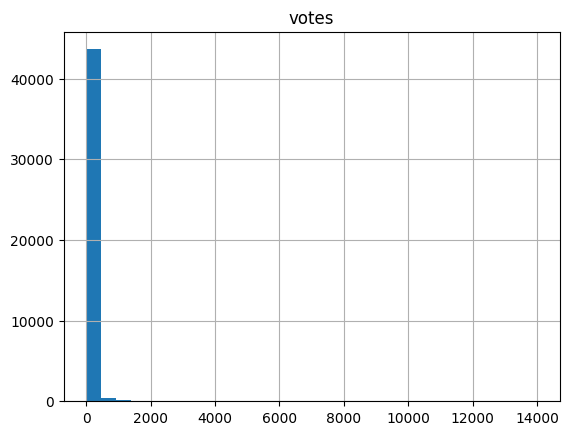

In [225]:
mbti_concat_all.hist('votes', bins=30)

In [217]:
threshold = np.quantile(mbti_concat_all['votes'], 0.75)
print(threshold)

23.0


In [228]:
mbti_all_cutoff = mbti_concat_all[mbti_concat_all['votes']>threshold]
len(mbti_all_cutoff)

10809

array([[<Axes: title={'center': 'votes'}>]], dtype=object)

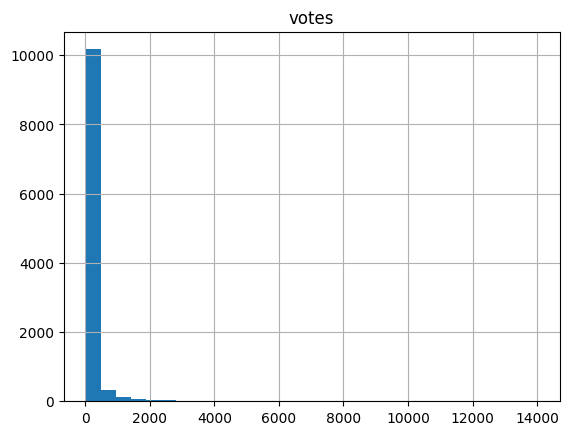

In [226]:
mbti_all_cutoff.hist('votes', bins=30)